# Importing Libraries and Visualizations

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Creating path for easier Access:

path = r'C:\Users\Lenovo\Desktop\Career Foundry\28-06-2024 Instacart Basket Analysis - Saswata Biswas'

In [6]:
# Importing latest pkl file from 4.8:

ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_aggregated.pkl'))

In [8]:
# Checking File to see if any data can be compressed:

ords_prods_merge.dtypes

order_id                     int32
user_id                      int32
order_number                  int8
orders_days_of_week           int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                   int32
add_to_cart_order            int16
reordered                     int8
product_name                object
aisle_id                     int16
department_id                 int8
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                     int8
loyalty_flag                object
average_spend              float64
spender_flag                object
customer_frequency         float16
frequency_flag              object
dtype: object

### Creating Bars

<Axes: xlabel='orders_days_of_week'>

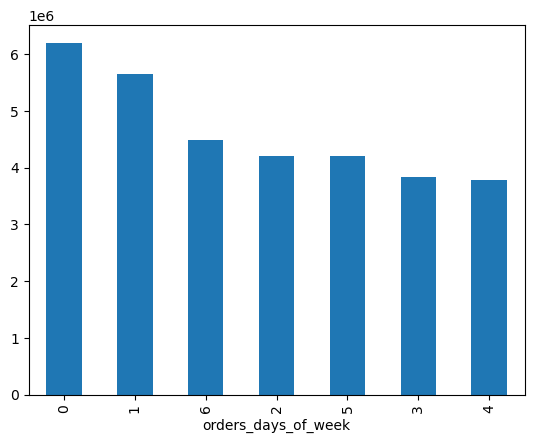

In [10]:
# Creating a Bar chars with Orders_days_of_week:

ords_prods_merge['orders_days_of_week'].value_counts().plot.bar()

#### Note to self: Always use value counts to create Bar charts instead of the column itself

##### The bar plot automatically sorts from largest to smallest. However, if you use the fuction sort_index, then it will sorts as per days of the week

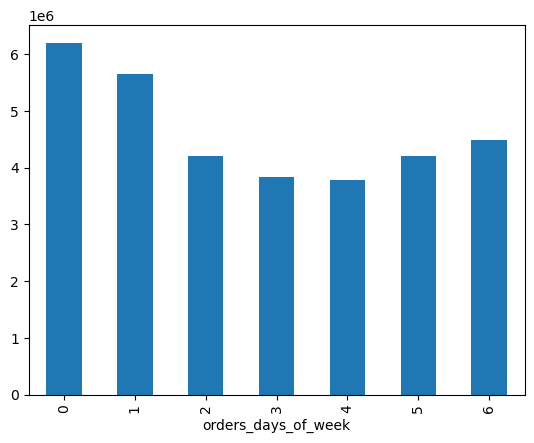

In [18]:
bar = ords_prods_merge['orders_days_of_week'].value_counts().sort_index().plot.bar()

#### Note to self: It might take sometime to display, be patient and wait.

#### Note to self: While the numbers stay the same, the order in which they appear has changed. This can be useful if your data would be easier to understand in its original order. Days of the week or months of the year, for instance, would be better understood if they were listed chronologically.

###### Let us try to give some colour to the bars

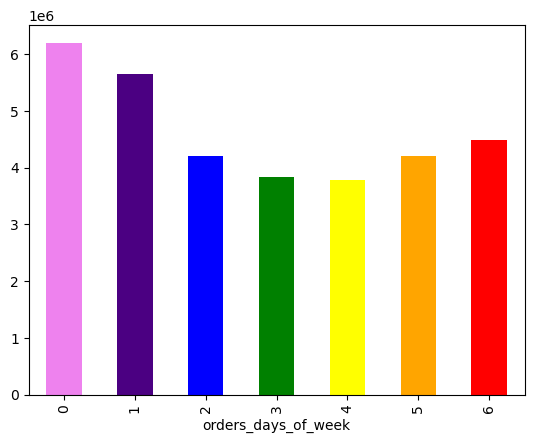

In [30]:
bar = ords_prods_merge['orders_days_of_week'].value_counts().sort_index().plot.bar(color = ['violet','indigo', 'blue', 'green', 'yellow', 'orange', 'red'])

### Note to self: Python recognises American English. Therefore, it should be 'color' instead of 'colour'

## Exporting Charts

In [36]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### Though the exercise did not mention, when we type bar = and then plt the diagram, it saves the diagram

### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

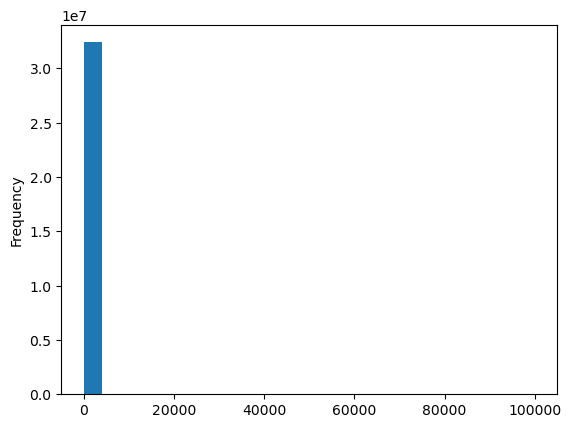

In [41]:
ords_prods_merge['prices'].plot.hist(bins = 25)

### Note to self: the milk priced at 99999.00 is messing with the histogram

In [48]:
# checking the details:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### No one will understand scientific numbers. Changing the view type

In [51]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [54]:
# checking the details:
ords_prods_merge['prices'].describe()

count   32404859.00
mean          11.98
std          495.66
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

### Note to self: When using the describe function, always try and specify which columns

### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

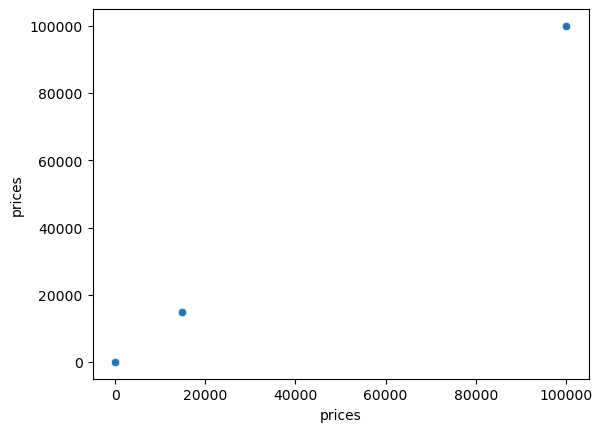

In [58]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

#### Note to self: Took 6 minutes, be patient

In [61]:
# Checking for prices above 100 dollars:

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag
1576,912404,17,12,2,14,5.00,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.65,High_spender,5.00,Frequent customer
1638,603376,17,22,6,16,4.00,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.65,High_spender,5.00,Frequent customer
16522,3264360,135,2,2,21,13.00,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.79,High_spender,11.50,Regular customer
16528,892534,135,3,0,8,12.00,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.79,High_spender,11.50,Regular customer
53672,229704,342,8,1,19,30.00,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.43,High_spender,20.00,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.00,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Most orders,25,Regular customer,351.14,High_spender,6.00,Frequent customer
32347717,2504315,205818,3,5,15,3.00,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,170.07,High_spender,12.00,Regular customer
32347727,1108388,205818,5,4,5,1.00,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Least busy,Slowest days,Fewest orders,25,Regular customer,170.07,High_spender,12.00,Regular customer
32380527,1916142,206049,1,2,17,0.00,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,5,New customer,938.03,High_spender,7.00,Frequent customer


#### There are values above 100 dollars that are skewing the charts. Let us mark them as missing using np.NaN fuction

In [64]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [66]:
# checking the details:
ords_prods_merge['prices'].describe()

count   32399732.00
mean           7.79
std            4.24
min            1.00
25%            4.20
50%            7.40
75%           11.30
max           25.00
Name: prices, dtype: float64

<Axes: ylabel='Frequency'>

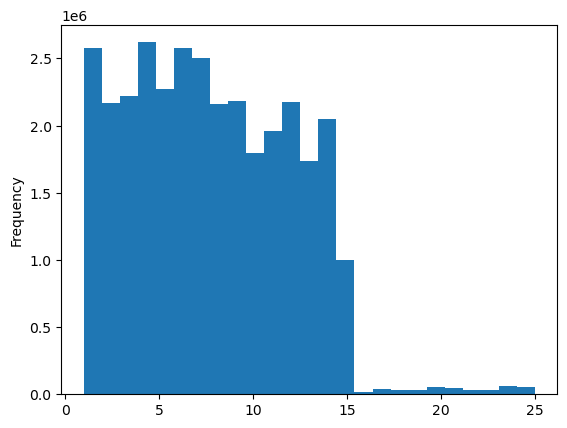

In [68]:
# Histogram again:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

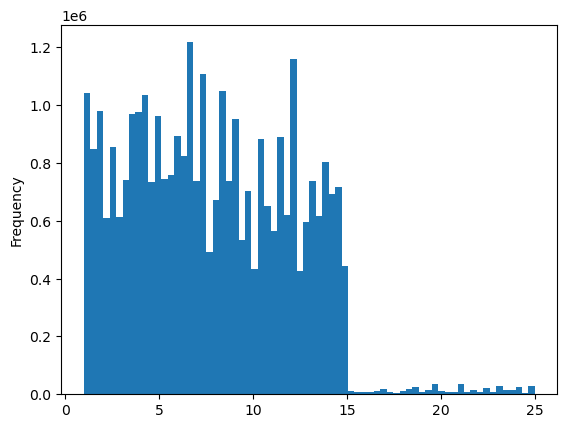

In [70]:
# Let's increase the granularity (number of bins):

ords_prods_merge['prices'].plot.hist(bins = 70)

### Note to self: We can clearly see the difference. However, it is not saved yet. To do so, we have to use the 'hist =" function

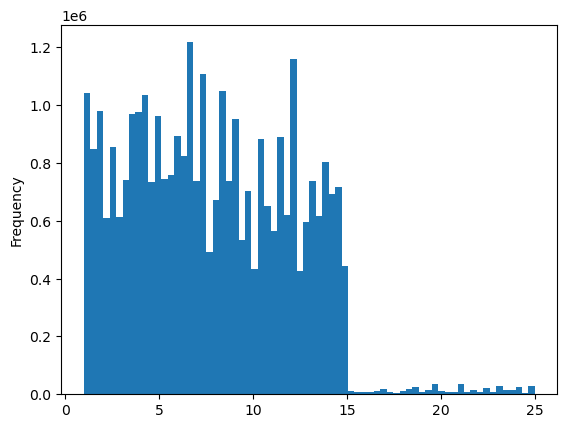

In [74]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [76]:
### Exporting the histogram after saving it:

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

### Creating Line Charts

#### This will test your RAM

In [80]:
# Checking how many unique values are in the prices column:
unique_values_prices = ords_prods_merge['prices'].nunique()

In [84]:
print("Number of unique values in prices column:", unique_values_prices)

Number of unique values in prices column: 240


### NOte to self: Sampling the first or the last million rows will not work

### Sampling data with 70/30 ratio

In [89]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

### The seed is set via the NumPy function random.seed(). We’ve set the seed to 4 for now. Feel free to do so as you follow along to ensure you’re using the same random pattern of numbers as in the examples. Then, in the second line of the command, you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7:

In [92]:
# Checking 10 values:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [94]:
# Storing big and small Sample:
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

##### The two dataframes above, big and small, are the samples you’ll create from your ords_prods_merge dataframe. What you want to do is store 70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample. You’ll do this according to the values in your dev list. For every value in the list that’s True, the corresponding row in your ords_prods_merge dataframe will be stored in the big sample. For every value in the list that’s False, the corresponding row in your dataframe will be stored in the small sample. Since True and False were determined by whether or not the random number was less than or greater than 0.7, this means that 70 percent of the rows should logically be sorted into big and 30 percent of the rows should logically be sorted into small. The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.

### Checking the lengths

In [98]:
len(big)

22683761

In [100]:
len(small)

9721098

In [102]:
len(ords_prods_merge)

32404859

In [104]:
len(big) + len(small)

32404859

#### Again, only use columns that are necessary for the function

In [107]:
df_2 = small[['orders_days_of_week','prices']]

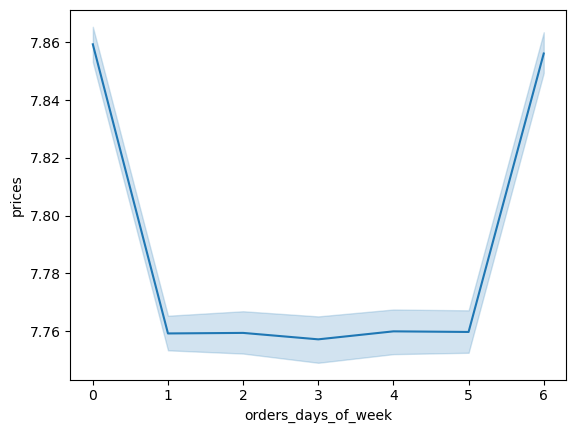

In [109]:
### Let us try to create the line chart

line = sns.lineplot(data = df_2, x = 'orders_days_of_week',y = 'prices')

#### Note to self: Took 5 minutes to generate

### Not creating the line chart for Big and entire df

In [115]:
### Exporting the line chart after saving it:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))